In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

In [11]:
file_path = '/content/drive/MyDrive/data/Onion_2019 (2).csv'
data = pd.read_csv(file_path)

In [12]:
data.head()

,state,district,market,variety,arrival_date,min_price,max_price,modal_price
0,Andaman and Nicobar,Nicobar,Car Nicobar,Other,7/6/2019,6000,10000,8000.0
1,Andaman and Nicobar,Nicobar,Car Nicobar,Other,11/6/2019,6000,10000,8000.0
2,Andaman and Nicobar,Nicobar,Car Nicobar,Other,12/6/2019,6000,10000,8000.0
3,Andaman and Nicobar,Nicobar,Car Nicobar,Other,13/06/2019,6000,10000,8000.0
4,Andaman and Nicobar,Nicobar,Car Nicobar,Other,14/06/2019,4000,8000,6000.0


In [13]:
data['arrival_date'] = pd.to_datetime(data['arrival_date'], dayfirst=True)
data['arrival_month'] = data['arrival_date'].dt.month
data['arrival_day'] = data['arrival_date'].dt.day

In [14]:
data.drop('arrival_date', axis=1, inplace=True)

In [15]:
data.head()

,state,district,market,variety,min_price,max_price,modal_price,arrival_month,arrival_day
0,Andaman and Nicobar,Nicobar,Car Nicobar,Other,6000,10000,8000.0,6,7
1,Andaman and Nicobar,Nicobar,Car Nicobar,Other,6000,10000,8000.0,6,11
2,Andaman and Nicobar,Nicobar,Car Nicobar,Other,6000,10000,8000.0,6,12
3,Andaman and Nicobar,Nicobar,Car Nicobar,Other,6000,10000,8000.0,6,13
4,Andaman and Nicobar,Nicobar,Car Nicobar,Other,4000,8000,6000.0,6,14


In [16]:
label_encoders = {}
for column in ['state', 'district', 'market', 'variety']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [17]:
data.head()

,state,district,market,variety,min_price,max_price,modal_price,arrival_month,arrival_day
0,0,246,161,13,6000,10000,8000.0,6,7
1,0,246,161,13,6000,10000,8000.0,6,11
2,0,246,161,13,6000,10000,8000.0,6,12
3,0,246,161,13,6000,10000,8000.0,6,13
4,0,246,161,13,4000,8000,6000.0,6,14


In [18]:
features = data.drop('modal_price', axis=1)
target = data['modal_price']
features.head()


,state,district,market,variety,min_price,max_price,arrival_month,arrival_day
0,0,246,161,13,6000,10000,6,7
1,0,246,161,13,6000,10000,6,11
2,0,246,161,13,6000,10000,6,12
3,0,246,161,13,6000,10000,6,13
4,0,246,161,13,4000,8000,6,14


In [19]:
target.head()

0    8000.0
1    8000.0
2    8000.0
3    8000.0
4    6000.0
Name: modal_price, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

X_train

,state,district,market,variety,min_price,max_price,arrival_month,arrival_day
75363,25,22,59,17,1440,1550,7,25
47884,20,80,439,13,900,1000,4,14
85815,25,108,809,17,800,870,3,4
80033,25,57,219,17,800,1000,2,9
67472,22,53,132,0,500,900,5,25
...,...,...,...,...,...,...,...,...
76820,25,28,587,17,1600,1690,7,16
110268,27,83,821,13,1600,2000,8,2
103694,25,306,328,11,1100,1200,1,12
860,2,168,648,12,1400,1600,6,3


In [21]:
X_test

,state,district,market,variety,min_price,max_price,arrival_month,arrival_day
107410,26,328,460,13,800,1000,3,11
78899,25,38,71,12,840,930,1,10
36810,14,3,808,0,550,700,2,14
90831,25,155,378,17,1200,1250,6,26
40820,14,241,611,13,150,800,4,20
...,...,...,...,...,...,...,...,...
59605,21,137,857,13,1300,1500,6,24
85014,25,105,146,17,500,650,1,29
72293,25,1,268,17,740,820,3,18
22767,12,171,417,13,1400,1500,4,6


In [22]:
y_train

75363     1490.0
47884      900.0
85815      850.0
80033      900.0
67472      700.0
           ...  
76820     1650.0
110268    1800.0
103694    1150.0
860       1500.0
15795     1100.0
Name: modal_price, Length: 92404, dtype: float64

In [23]:
y_test

107410     900.0
78899      880.0
36810      550.0
90831     1230.0
40820      575.0
           ...  
59605     1400.0
85014      570.0
72293      795.0
22767     1450.0
89030      850.0
Name: modal_price, Length: 23102, dtype: float64

In [27]:

models = {
    "Linear Regression": LinearRegression(),
    "K-NN Regressor": KNeighborsRegressor(),
    "K-Means": KMeans(n_clusters=2, n_init=10),
}

metrics = {}

for name, model in models.items():
    if name == "K-Means":
        model.fit(X_train)
        predictions = model.predict(X_test)
        y_test_binarized = (y_test > y_test.mean()).astype(int)
        predictions_binarized = (predictions > predictions.mean()).astype(int)
        accuracy = accuracy_score(y_test_binarized, predictions_binarized)
        metrics[name] = accuracy
        print(f"{name} Accuracy: {accuracy}")
    else:
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        mse = mean_squared_error(y_test, predictions)
        r2 = r2_score(y_test, predictions)

        threshold = y_train.mean()
        y_test_binarized = (y_test > threshold).astype(int)
        predictions_binarized = (predictions > threshold).astype(int)
        accuracy = accuracy_score(y_test_binarized, predictions_binarized)
        metrics[name] = (mse, r2, accuracy)
        print(f"{name} - MSE: {mse}, R2: {r2}, Accuracy: {accuracy}")



Linear Regression - MSE: 9471.220849783085, R2: 0.979898413570023, Accuracy: 0.9764955415115575
K-NN Regressor - MSE: 2656.268347779413, R2: 0.9943623732757406, Accuracy: 0.985066228032205
K-Means Accuracy: 0.6941390355813349


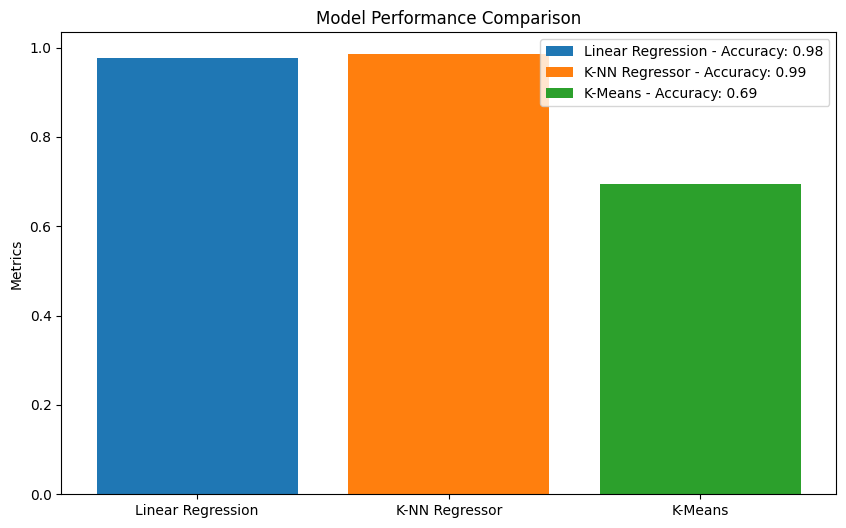

In [32]:
plt.figure(figsize=(10, 6))
for name, metric in metrics.items():
    if name in ["Linear Regression", "K-NN Regressor"]:
        plt.bar(name, metric[2], label=f"{name} - Accuracy: {metric[2]:.2f}")
    else:
        plt.bar(name, metric, label=f"{name} - Accuracy: {metric:.2f}")

plt.ylabel("Metrics")
plt.title("Model Performance Comparison")
plt.legend()
plt.show()
